# [1] 2D Linear Optimisation

Given a two-dimensional data points, we want to find a linear function which best estimates them.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import *

init_printing(use_unicode=True)

### Input Data Points
Initialise all input data for optimisation problems.

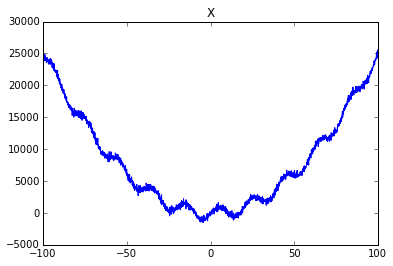

In [2]:
def f(t):
    return 2.5*t**2 - 100

t  = np.arange(-100,100,0.1)
x0 = f(t) # Raw X
n  = np.random.normal(0,300,x0.shape) # Gaussian noises
m  = 1000*np.sin(t/np.pi) # Ripple noises

# Noisy data points `X` we want to estimate
x  = x0 + n + m

plt.figure(1)
plt.title('X')
plt.plot(t, x)
plt.show()


### [1.1] Least square error fitting

Given data points `X`, we want to find the best estimated polynomial 
which yields minimal least square error.

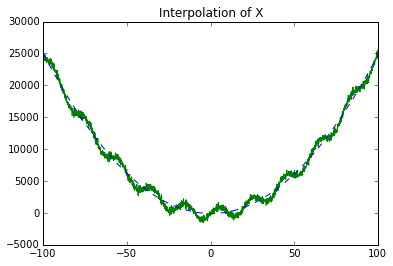

In [3]:
c  = np.polyfit(t, x, 2) # Coefficients of degree-2 polynomial
ft = np.poly1d(c) # Generate polynomial func

x_ = ft(t) # Generate interpolated values

plt.figure(1)
plt.plot(t, x, color='green')
plt.plot(t, x_, color='blue', linestyle='dashed')
plt.title('Interpolation of X')
plt.show()

# Build symbolic polynomial expression 
z = symbols('x')
p = c[0]*z**2 + c[1]*z + c[0]
p

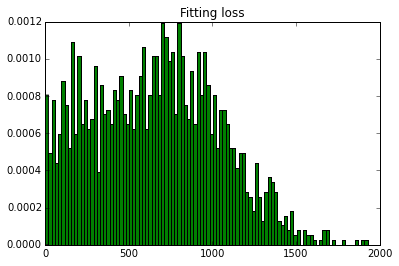

RMSE = 576011.836


In [4]:
# Compute the distributions of errors
e    = np.abs(x - x_)
rmse = np.mean((x - x_)**2)

plt.figure(1)
plt.title('Fitting loss')
plt.hist(e, 100, normed=1, facecolor='g')
plt.show()

print('RMSE = {0:0.3f}'.format(rmse))

### [1.2] Kalman Filter

TAOTODO:

# [2] 3D Linear Optimisation

Now move on to optimise the estimates over 3D data points.

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


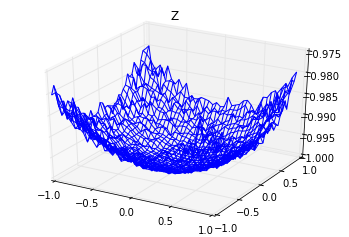

In [5]:
def g(X,Y):
    # Paraboloid with ripple noises
    return (X**2 + Y**2)/100 - np.random.normal(1, (X**2 + Y**2)/1000)

res = 0.05
X = np.arange(-1,1,res)
Y = np.arange(-1,1,res)
X,Y = np.meshgrid(X,Y)

# Noisy data (X,Y,Z) now ready for fitting
Z = g(X,Y)

from mpl_toolkits.mplot3d import Axes3D

fig  = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

ax3d.plot_wireframe(X,Y,Z)
plt.title('Z')
plt.show()


### [2.1] Gradient Descent : Finding global minima

Search for the global minima of `Z` towards the gradient of it.

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


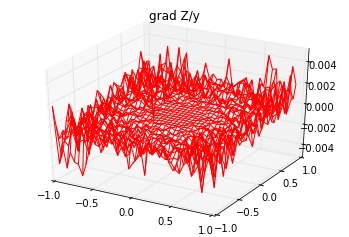

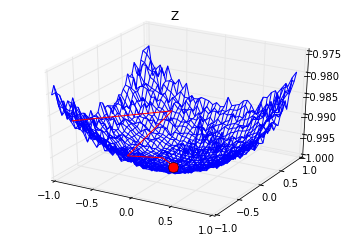

Coordinate of minima : (-0.050,-0.050,-1.000)


In [14]:
# Calculate gradient of Z
dZy,dZx = np.gradient(Z)

# Plot gradient
fig  = plt.figure(1)
ax3d = fig.add_subplot(111, projection='3d')

ax3d.plot_wireframe(X,Y,dZy,color='r')
plt.title('grad Z/y')
plt.show()

# Random where to start searching (preferrably from the edge)
u,v = np.random.choice(range(5),2)

routex = [X[v][u]]
routey = [Y[v][u]]
routez = [Z[v][u]]
iters  = 10
alpha  = 500
i      = 0


while i<iters:
    x  = X[u]
    y  = Y[v]
    # Update x,y with respect to the gradient at (x,y)
    # x' = x - alpha* grad(x)
    dx = alpha * dZx[v][u]
    dy = alpha * dZy[v][u]
            
    # Find the next position to traverse
    du = int(np.ceil(dx/res))
    dv = int(np.ceil(dy/res))
    
    u  = u - du
    v  = v - dv
    
    routex.append(X[v][u])
    routey.append(Y[v][u])
    routez.append(Z[v][u])
    i += 1

# Visualise the path
fig  = plt.figure(1)
ax3d = fig.add_subplot(111, projection='3d')

minx, miny, minz = routex[-1], routey[-1], routez[-1]

ax3d.plot_wireframe(X, Y, Z) # Raw Z
ax3d.plot(routex, routey, zs=routez, color='r') # Gradient descent path
ax3d.plot([minx], [miny], [minz], 'o', color='r', markersize=10) # Minima point

plt.title('Z')
plt.show()

print('Coordinate of minima : ({0:.3f},{1:.3f},{2:.3f})'.format(minx,miny,minz))


### [2.2] Newton's method (Finding minima)
[Newton's method](http://mathfaculty.fullerton.edu/mathews/n2003/NewtonSearchMod.html) is an estimation method for finding roots of a function. Then approximate minima from them.

In [7]:
# Estimate Hessian of Z
def hessian(Z,i,j):
    return 0

routex = [X[v][u]]
routey = [Y[v][u]]
routez = [Z[v][u]]
iters  = 10
alpha  = 500 # Step size
i      = 0

while i<iters:
    # Update the path such that
    # dx = -H(x)^-1 . Grad(x)
    hx = hessian(Z)
    hy = 0
    
    i += 1

### [2.3] Broyden's Method (Finding Minima)
[Broyden's method](https://en.wikipedia.org/wiki/Broyden's_method) is also one of the Newton's method family of finding root of a linear equation system. 

Useful resource for [Jacobian of 2D data](http://www.ltcconline.net/greenl/courses/202/multipleIntegration/Jacobians2DTheory.htm)

In [15]:
# TAOTODO:

